<a href="https://www.kaggle.com/code/gabrielluizone/heuristic-search?scriptVersionId=154059513" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## $\mathbb{Faculdade\textbf{ }de\textbf{ }Tecnologia\textbf{ }da\textbf{ }Baixada \textbf{ }Santista}$
#### **Busca Heurística | v.2**
- Inteligência Computacional `Ciência de Dados`

In [57]:
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

plt.style.use('fivethirtyeight')

#### Definição do Valor Herístico e seu Cálculo
> **Manhattan Distance**: Por que escolhemos ela? Vamos usar como exemplo uma analogia entre a diferença entre essas duas distâncias, vamos imaginar uma a rota de GPS para dois veículos, uma para um carro e outra para um helicóptero. A Distância Euclidiana seria o segmento de uma reta na qual indicaria uma possível rota de helicóptero (na qual não haveria preocupação com as ruas já que é um veículo aéreo, e geometricamente seria a hipotenusa de um triângulo) e a Distância Manhattan seria um segmento de retas na vertical quanto na horizontal semelhante a uma rota de carro (já que esse obedece o sentido das ruas, e devido à esse comportamento essa medida de distância é também conhecida como City Block, e  geometricamente seriam a soma dos catetos).

Fonte: [MineracaoDeDados](https://mineracaodedados.wordpress.com/tag/distancia-manhattan/#:~:text=J%C3%A1%20a%20Dist%C3%A2ncia%20Manhattan%20tem,y1%20%E2%80%93%20y2%7C.)

#### $\text{Euclidean Distance: } \sqrt{{(x_1 - x_2)^2 + (y_1 - y_2)^2}}$
#### $\text{Manhattan Distance: } |x_1 - x_2| + |y_1 - y_2|$

In [58]:
def h(p1, p2):
    #return ((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2 )**(1/2) # Euclides
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]) # Manhattan 

### Função para Visualização Real
- Atualização do Gráfico
---

In [59]:
####### A Estrela ###############################################################
# Plot para a Visualização Formatada do Gráfico em Tempo Real :D
def visualize(labirinto, caminho, inicio, fim, aberto, fechado, g_score, f_score, hr, end):
    plt.figure(figsize=(10, 10), dpi=150)
    plt.imshow(labirinto, cmap='gray', interpolation='nearest')
    if hr:
        for node in aberto:
            plt.text(node[1], node[0], str(g_score[node]) + '/ ' + str(f_score[node] - g_score[node]), color='r', fontsize=10)
            plt.plot([x[1] for x in aberto], [x[0] for x in aberto], 'o', color='#5268f7', markersize=8)
            plt.plot([x[1] for x in fechado], [x[0] for x in fechado], 'o', color='#202124', markersize=7)#, alpha=.5)
    plt.plot([x[1] for x in caminho], [x[0] for x in caminho], color='#5f7fc7', linewidth=5)
    if not end:
        plt.plot([x[1] for x in aberto], [x[0] for x in aberto], 'o', color='#5268f7', markersize=8)
        plt.plot([x[1] for x in fechado], [x[0] for x in fechado], 'o', color='#202124', markersize=7)#, alpha=.5)
        plt.scatter(inicio[1], inicio[0], color='#f75252', label='Começo', s=80, marker='s')
        plt.scatter(fim[1], fim[0], color='#52f789', label='Chegada', s=80, marker='s')
    plt.grid(False)
    plt.title('Busca A* (Heurística) em Labirinto')
    plt.show()

####### Gulosa ###############################################################
# Plot para a Visualização Formatada do Gráfico em Tempo Real :D
def visualizeg(labirinto, caminho, inicio, fim, aberto, fechado, f_score, hr, end):
    plt.figure(figsize=(10, 10), dpi=150)
    plt.imshow(labirinto, cmap='gray', interpolation='nearest')
    if hr:
        for node in aberto:
            plt.text(node[1], node[0], str(f_score[node]), color='r', fontsize=8)
            plt.plot([x[1] for x in aberto], [x[0] for x in aberto], 'o', color='#b36d37', markersize=8)
            plt.plot([x[1] for x in fechado], [x[0] for x in fechado], 'o', color='#202124', markersize=7)#, alpha=.5)
    plt.plot([x[1] for x in caminho], [x[0] for x in caminho], color='#e89d64', linewidth=5)
    if not end:
        plt.plot([x[1] for x in aberto], [x[0] for x in aberto], 'o', color='#b36d37', markersize=10)
        plt.plot([x[1] for x in fechado], [x[0] for x in fechado], 'o', color='#202124', markersize=7)#, alpha=.5)
        plt.scatter(inicio[1], inicio[0], color='#f75252', label='Começo', s=80, marker='s')
        plt.scatter(fim[1], fim[0], color='#52f789', label='Chegada', s=80, marker='s')
    plt.grid(False)
    plt.title('Busca Gulosa (Heurística) em Labirinto')
    plt.show()

### Considerações do Algoritmo
> O Algoritmo funciona como uma arvore de decisão, como ele está em um labirinto gerado aleatóriamente, ele precisa ser saber lidar nesse lugar, por exemplo: lidar com as paredes, nós que ele já expandiu, caminhos que ele já passou e entre outras considerações. Meio que ele usa a matriz, e cria com base nela, cria uma arvore de decisão para chegar no objetivo, mas como ele não tem a arvore completa, ele vai indo conforme dá.

O Algoritmo é para o uso didatico no labirinto, ele não é a busca heurística, ele utiliza o valor Heurístico (que no caso depende da busca ser Gulosa ou A*), e usa como motor principal. Então, o motor principal dele é o valor herístico. Se quiser, você pode mudar como é feito o calculo para ver como o algoritmo se comportará

#### **Como o Algoritmo de Busca Gulosa Funciona?**
---
<details>
  <summary>Exiba a explicação!</summary>

1. **Definição da função**: A função `greedy_search` recebe cinco parâmetros: `labirinto`, `inicio`, `fim`, `it` e `hr`. O `labirinto` é uma matriz que representa o labirinto, `inicio` e `fim` são as coordenadas do ponto de partida e do destino, respectivamente. `it` é um parâmetro opcional que determina a frequência de visualização do labirinto durante a execução do algoritmo. `hr` é um parâmetro opcional que, se verdadeiro, habilita a visualização do valor da Heurística (o que pode atrapalhar).

2. **Movimentos possíveis**: A variável `vizinhos` é uma lista de tuplas que representam os movimentos possíveis a partir de uma posição (cima, baixo, direita, esquerda).

3. **Nós explorados e não explorados**: `fechado` e `aberto` são listas que armazenam os nós já explorados e os que ainda precisam ser explorados, respectivamente.

4. **Rastreamento do caminho**: `veio_de` é um dicionário que armazena de onde veio cada nó, permitindo rastrear o caminho de volta ao início uma vez que o destino é alcançado.

5. **Função heurística**: `f_score` é um dicionário que armazena os valores da função heurística para cada nó. A função heurística é uma estimativa do custo para alcançar o objetivo a partir de um determinado nó.

6. **Loop principal**: O algoritmo entra em um loop, explorando os nós até que a lista `aberto` esteja vazia (ou seja, todos os nós foram explorados) ou até que o destino seja alcançado.

7. **Escolha do próximo nó**: Em cada iteração do loop, o algoritmo escolhe o nó com o menor valor de função heurística na lista `aberto`.

8. **Verificação do destino**: Se o nó atual é o destino, o algoritmo reconstrói o caminho do destino ao início usando o dicionário `veio_de` e retorna o caminho.

9. **Exploração dos vizinhos**: Se o nó atual não é o destino, o algoritmo explora os vizinhos do nó atual. Ele verifica se cada vizinho está dentro dos limites do labirinto e se é um caminho livre (não é uma parede). Se o vizinho já foi explorado (está na lista `fechado`), ele é ignorado.

10. **Atualização das informações**: Para cada vizinho que passa nas verificações, o algoritmo atualiza o dicionário `veio_de` e o dicionário `f_score`, e adiciona o vizinho à lista `aberto`.
</details>


In [60]:
def greedy_search(labirinto, inicio, fim, it=1, hr=False):
    # Lista de movimentos possíveis (cima, baixo, direita, esquerda)
    vizinhos = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    # Conjuntos de nós explorados e o que ainda falta explorar
    fechado = []
    aberto = [inicio]
    
    # Dicionário para rastrear o caminho
    veio_de = {}
    
    # Dicionário para armazenar os valores da função heurística
    f_score = {inicio: h(inicio, fim)}
    
    # Loop principal da Busca Gulosa
    while aberto:
        # Escolhe o nó com menor heurística
        atual = min(aberto, key=lambda x: f_score[x])

        # Verifica se alcançou o destino
        if atual == fim:
            caminho = []
            while atual in veio_de:
                caminho.append(atual)
                atual = veio_de[atual]
            caminho.append(inicio)
            caminho.reverse()
            
            # Visualiza o labirinto com o caminho encontrado 
            visualizeg(labirinto, caminho, inicio, fim, aberto, fechado, f_score, hr, end=True)
            return caminho

        # Move o nó atual de aberto para fechado
        aberto.remove(atual)
        fechado.append(atual)

        # Explora os vizinhos do nó atual
        for i, j in vizinhos:
            vizinho = atual[0] + i, atual[1] + j
            
            # Verifica se o vizinho está dentro dos limites do labirinto
            if 0 <= vizinho[0] < labirinto.shape[0]:
                if 0 <= vizinho[1] < labirinto.shape[1]:
                    # Verifica se o vizinho é um caminho livre (não é uma parede)
                    if labirinto[vizinho[0]][vizinho[1]] == 1:
                        continue
                else: continue
            else: continue

            # Verifica se o vizinho já foi explorado
            if vizinho in fechado: continue

            # Atualiza as informações sobre o vizinho
            veio_de[vizinho] = atual
            f_score[vizinho] = h(vizinho, fim)
            
            # Adiciona o vizinho à lista de nós a explorar
            if vizinho not in aberto and vizinho not in fechado:
                aberto.append(vizinho)

        # Visualiza o labirinto durante a execução do algoritmo (opcional)
        if len(aberto) % it == 0:  # Visualiza a cada 20 iterações
            visualizeg(labirinto, [], inicio, fim, aberto, fechado, f_score, hr, end=False)
            clear_output(wait=True)  # Limpa a saída do Jupyter Notebook

    return False

#### **Como o Algoritmo de Busca A Estrela Funciona?**
---
<details>
  <summary>Exiba a explicação!</summary>
1. **Definição da função**: A função `a_star` recebe cinco parâmetros: `labirinto`, `inicio`, `fim`, `it` e `hr`. O `labirinto` é uma matriz que representa o labirinto, `inicio` e `fim` são as coordenadas do ponto de partida e do destino, respectivamente. `it` é um parâmetro opcional que determina a frequência de visualização do labirinto durante a execução do algoritmo. `hr` é um parâmetro opcional que, se verdadeiro, habilita a visualização do labirinto.

2. **Movimentos possíveis**: A variável `vizinhos` é uma lista de tuplas que representam os movimentos possíveis a partir de uma posição (cima, baixo, direita, esquerda).

3. **Nós explorados e não explorados**: `fechado` e `aberto` são conjuntos que armazenam os nós já explorados e os que ainda precisam ser explorados, respectivamente.

4. **Rastreamento do caminho**: `veio_de` é um dicionário que armazena de onde veio cada nó, permitindo rastrear o caminho de volta ao início uma vez que o destino é alcançado.

5. **Custos acumulados e heurísticas**: `g_score` é um dicionário que armazena os custos acumulados para cada nó. `f_score` é um dicionário que armazena os valores da função heurística para cada nó. A função heurística é uma estimativa do custo para alcançar o objetivo a partir de um determinado nó.

6. **Loop principal**: O algoritmo entra em um loop, explorando os nós até que a lista `aberto` esteja vazia (ou seja, todos os nós foram explorados) ou até que o destino seja alcançado.

7. **Escolha do próximo nó**: Em cada iteração do loop, o algoritmo escolhe o nó com o menor valor de função heurística na lista `aberto`.

8. **Verificação do destino**: Se o nó atual é o destino, o algoritmo reconstrói o caminho do destino ao início usando o dicionário `veio_de` e retorna o caminho.

9. **Exploração dos vizinhos**: Se o nó atual não é o destino, o algoritmo explora os vizinhos do nó atual. Ele verifica se cada vizinho está dentro dos limites do labirinto e se é um caminho livre (não é uma parede). Se o vizinho já foi explorado (está na lista `fechado`), ele é ignorado.

10. **Atualização das informações**: Para cada vizinho que passa nas verificações, o algoritmo atualiza o dicionário `veio_de` e os dicionários `g_score` e `f_score`, e adiciona o vizinho à lista `aberto`.

11. **Visualização**: Opcionalmente, o algoritmo pode visualizar o estado atual do labirinto a cada `it` iterações.
<details>

In [61]:
def a_star(labirinto, inicio, fim, it=1, hr=False):
    # Lista de movimentos possíveis (cima, baixo, direita, esquerda)
    vizinhos = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    
    # Conjuntos de nós explorados e o que ainda falta explorar
    fechado = set()  # Usamos um conjunto para operações mais rápidas de adicionar e verificar
    aberto = [inicio]
    
    # Dicionário para rastrear o caminho
    veio_de = {}
    
    # Dicionários para armazenar os custos acumulados e heurísticas
    g_score = {inicio: 0}
    f_score = {inicio: h(inicio, fim)}  # Aqui calculamos a Heurística

    # Loop principal do algoritmo A*
    while aberto:
        # Escolhe o nó com menor f_score
        atual = min(aberto, key=lambda x: f_score.get(x, np.inf))

        # Verifica se alcançou o destino
        if atual == fim:
            caminho = []
            while atual in veio_de:
                caminho.append(atual)
                atual = veio_de[atual]
            caminho.append(inicio)
            caminho.reverse()
            
            # Visualiza o labirinto com o caminho encontrado
            visualize(labirinto, caminho, inicio, fim, aberto, list(fechado), g_score, f_score, hr, end=True)
            return caminho

        # Move o nó atual de aberto para fechado
        aberto.remove(atual)
        fechado.add(atual)  # Usamos add() para adicionar ao conjunto

        # Explora os vizinhos do nó atual
        for i, j in vizinhos:
            vizinho = atual[0] + i, atual[1] + j
            tentativa_g_score = g_score[atual] + 1

            # Verifica se o vizinho está dentro dos limites do labirinto
            if 0 <= vizinho[0] < labirinto.shape[0]:
                if 0 <= vizinho[1] < labirinto.shape[1]: 
                    # Verifica se o vizinho é um caminho livre (não é uma parede)
                    if labirinto[vizinho[0]][vizinho[1]] == 1:
                        continue
                else: continue
            else: continue

            # Verifica se o vizinho já foi explorado e se o novo caminho é melhor
            if vizinho in fechado and tentativa_g_score >= g_score.get(vizinho, 0): continue

            # Atualiza as informações sobre o vizinho
            if tentativa_g_score < g_score.get(vizinho, 0) or vizinho not in aberto:
                veio_de[vizinho] = atual
                g_score[vizinho] = tentativa_g_score
                f_score[vizinho] = tentativa_g_score + h(vizinho, fim)
                
                # Adiciona o vizinho à lista de nós a explorar
                if vizinho not in aberto:
                    aberto.append(vizinho)

        # Visualiza o labirinto durante a execução do algoritmo
        if len(aberto) % it == 0:  # Visualiza a cada 20 iterações
            visualize(labirinto, [], inicio, fim, aberto, list(fechado), g_score, f_score, hr, end=False)
            clear_output(wait=True)  # Limpa a saída do Jupyter Notebook

    return False

---
### Criação do Labirinto

In [62]:
# Dimensão do Labirinto
d = 15, 45

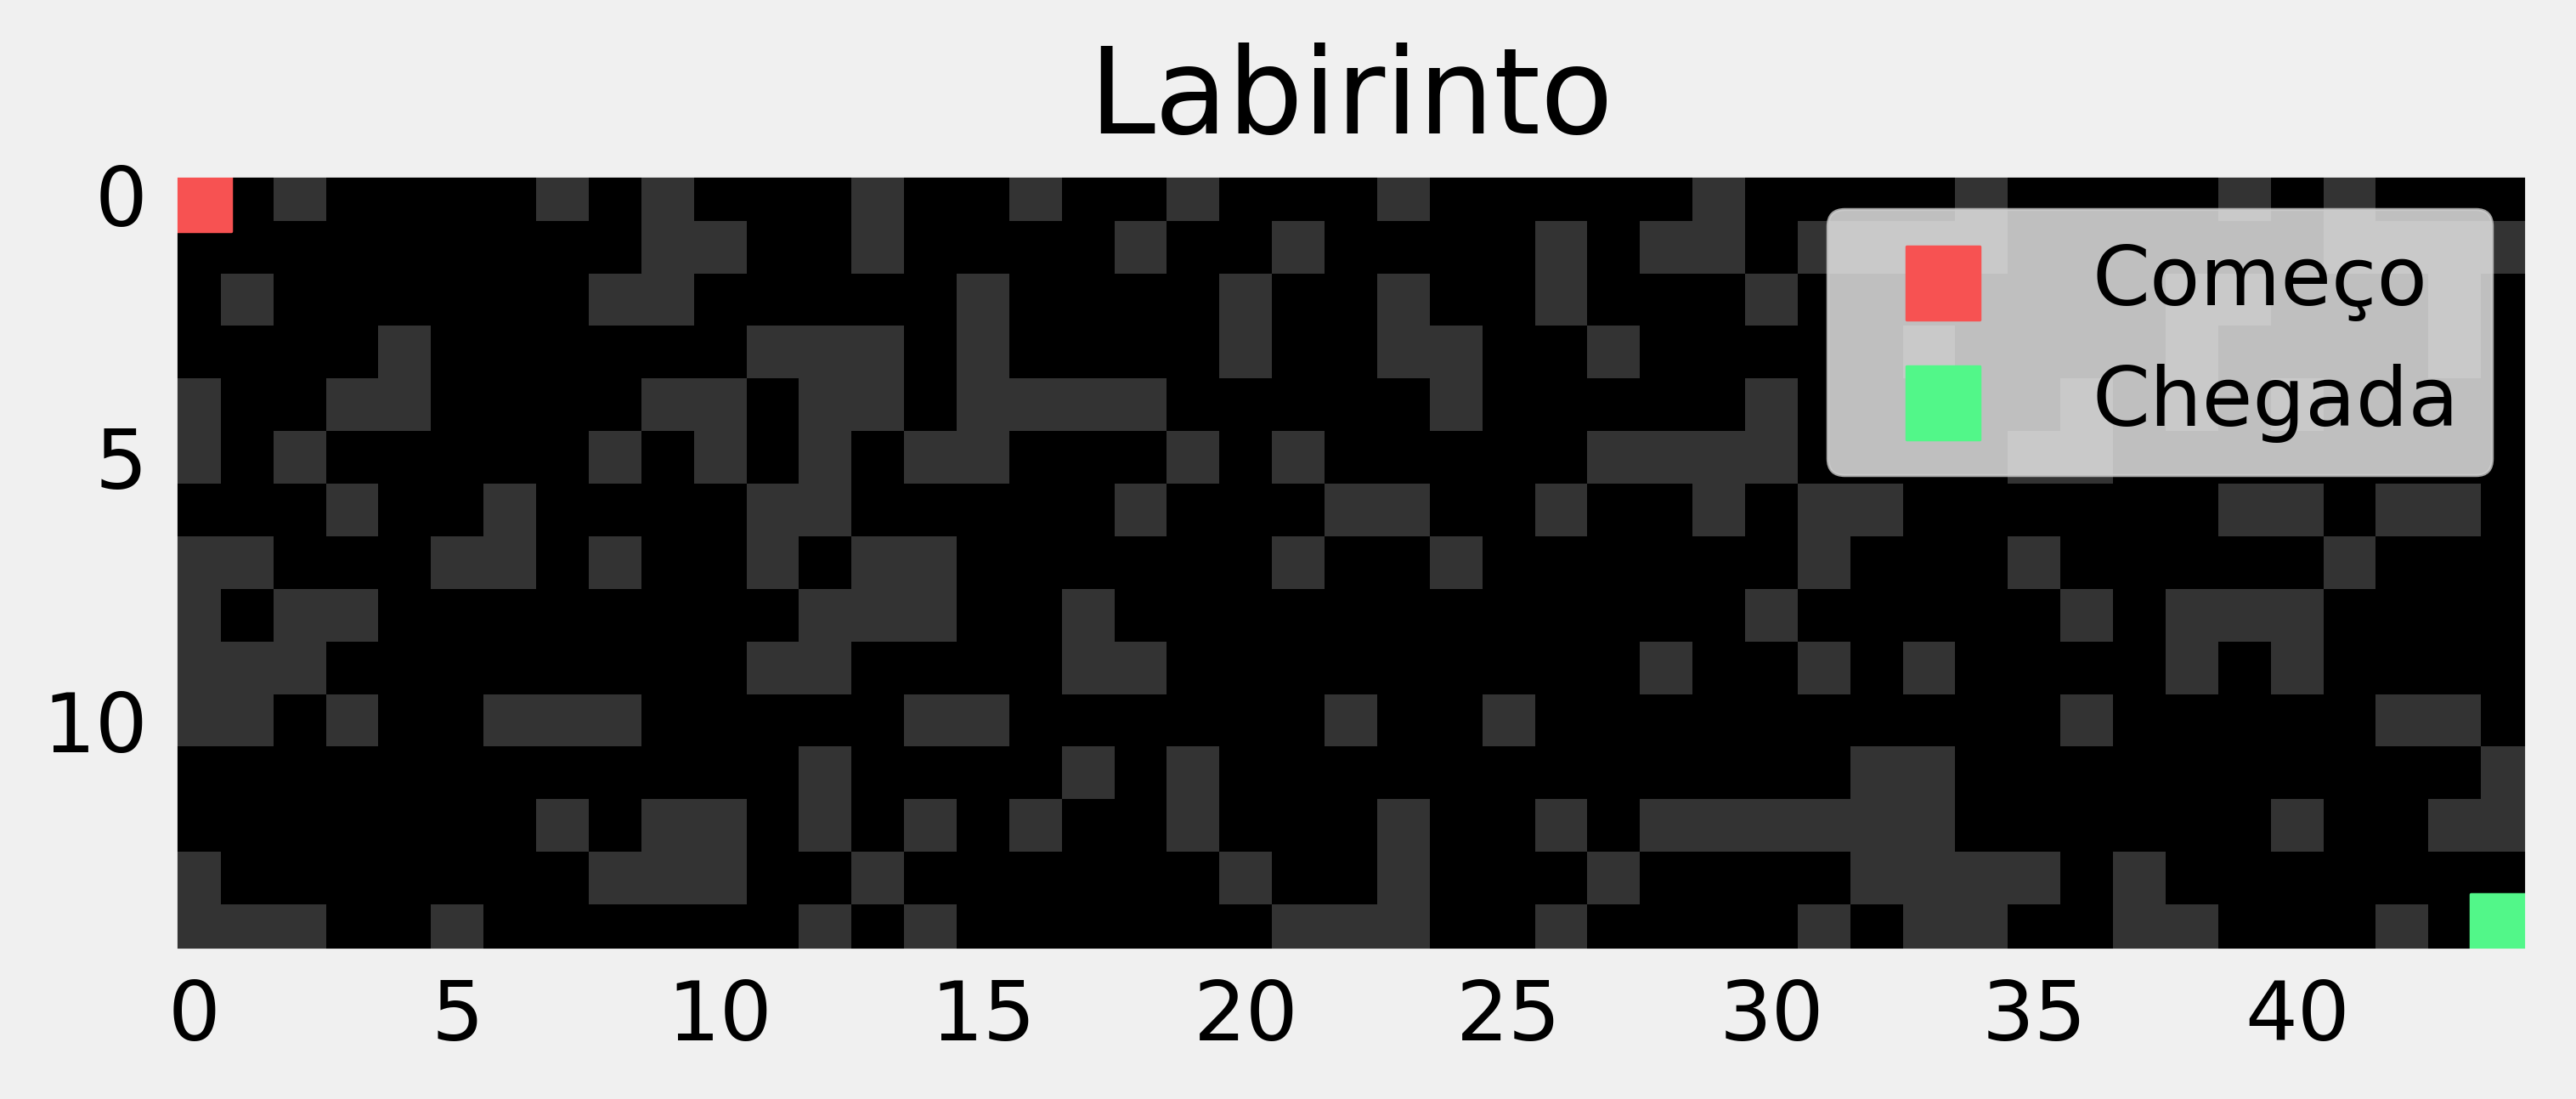

In [85]:
# Criação do labirinto & Definição do ponto de início (A) e fim (B)
labirinto = np.random.choice([0, 1], size=(d[0], d[1]), p=[.7, .3])

# Remover barreiras no inicio e fim
labirinto[ d[0]-1 ][ d[1]-1 ] = 0
labirinto[ d[0]-1 ][ d[1]-2 ] = 0
labirinto[ d[0]-2 ][ d[1]-1 ] = 0

labirinto[0][0] = 5
labirinto[0][1] = 0
labirinto[1][0] = 0

inicio = (0, 0)
fim = (d[0]-1, d[1]-1)

plt.figure(dpi=500)
plt.imshow(labirinto, cmap='gray', interpolation='nearest')
plt.scatter(inicio[1], inicio[0], color='#f75252', label='Começo', s=150, marker='s')
plt.scatter(fim[1], fim[0], color='#52f789', label='Chegada', s=150, marker='s')
plt.title('Labirinto'), plt.grid(False), plt.legend(), plt.show();

### Busca Gulosa $\color{#4d965e}{\textbf{(Greedy Search)}}$
> **Objetivo:** Escolher em cada iteração, o caminho menos custoso até o objetivo

A Busca Gulosa expande o nó que parece estar mais próximo do objetivo, sem levar em consideração o custo do caminho percorrido até aquele nó. Ela usa uma função heurística $f(n) = h(n)$ para estimar o custo do caminho. Isso pode levar a soluções não ótimas, pois a busca gulosa pode se comprometer com um caminho que parece promissor, mas acaba sendo mais caro.

- **Problema:** Podemos ir a um beco sem saida. Se não detectamos repetições, ficaremos em Loop

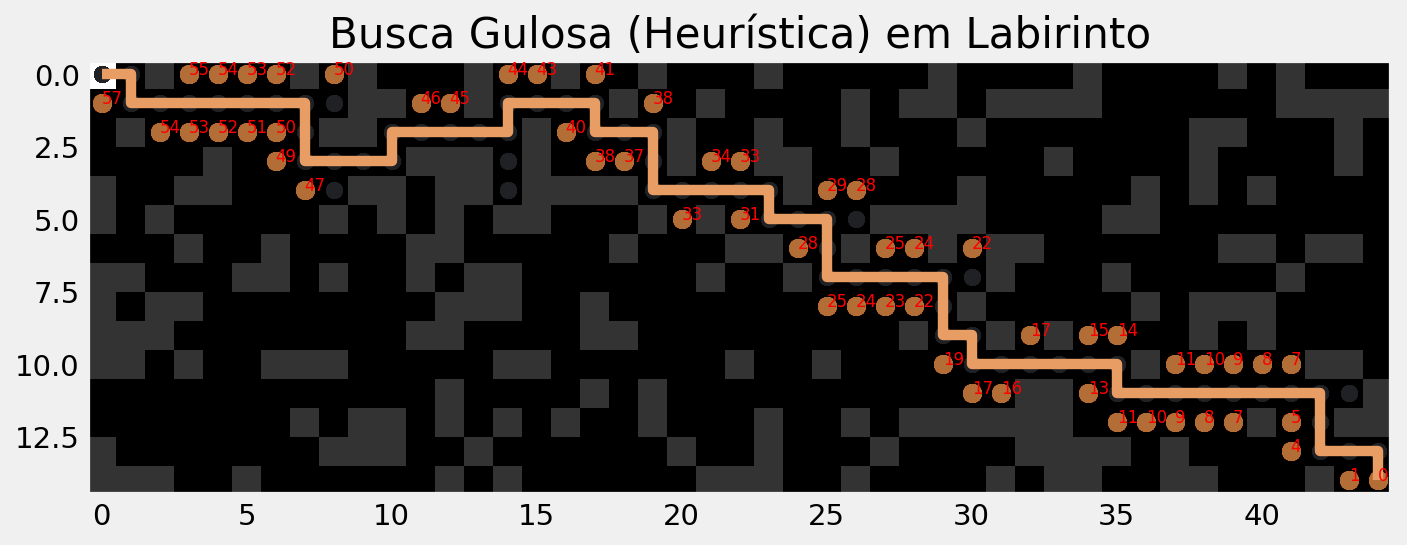

In [90]:
caminho_ok = greedy_search(labirinto, inicio, fim, it=1, hr=1)

In [91]:
print(caminho_ok)

[(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (3, 8), (3, 9), (3, 10), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (1, 14), (1, 15), (1, 16), (1, 17), (2, 17), (2, 18), (2, 19), (3, 19), (4, 19), (4, 20), (4, 21), (4, 22), (4, 23), (5, 23), (5, 24), (5, 25), (6, 25), (7, 25), (7, 26), (7, 27), (7, 28), (7, 29), (8, 29), (9, 29), (9, 30), (10, 30), (10, 31), (10, 32), (10, 33), (10, 34), (10, 35), (11, 35), (11, 36), (11, 37), (11, 38), (11, 39), (11, 40), (11, 41), (11, 42), (12, 42), (13, 42), (13, 43), (13, 44), (14, 44)]


### Busca A* $\color{#96724d}{\textbf{(Busca A Estrela)}}$
> **Objetivo:** Encontrar o caminho mais curto e menos custoso em um labirinto

O Algoritmo A*, leva em consideração tanto o custo do caminho já percorrido $(g(n))$ quanto a estimativa do custo restante até o objetivo $(h(n))$. Ele usa uma função de avaliação $f(n) = g(n) + h(n)$ para escolher qual nó expandir em seguida, ele verifica todos os nós e análisa qual tem o menor valor de $f(n)$.

- **Problemas:** Mais lento, mantém todos os nós na memória

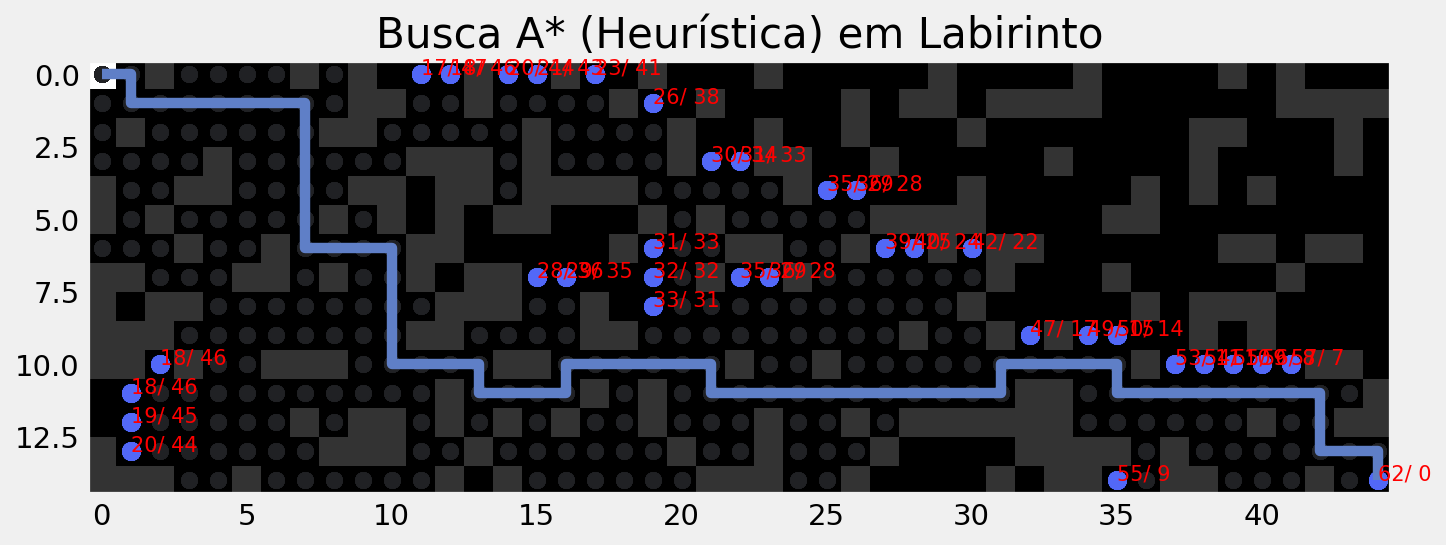

In [92]:
caminho_otimo = a_star(labirinto, inicio, fim, it=1, hr=1)

In [93]:
print(caminho_otimo)

[(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 7), (3, 7), (4, 7), (5, 7), (6, 7), (6, 8), (6, 9), (6, 10), (7, 10), (8, 10), (9, 10), (10, 10), (10, 11), (10, 12), (10, 13), (11, 13), (11, 14), (11, 15), (11, 16), (10, 16), (10, 17), (10, 18), (10, 19), (10, 20), (10, 21), (11, 21), (11, 22), (11, 23), (11, 24), (11, 25), (11, 26), (11, 27), (11, 28), (11, 29), (11, 30), (11, 31), (10, 31), (10, 32), (10, 33), (10, 34), (10, 35), (11, 35), (11, 36), (11, 37), (11, 38), (11, 39), (11, 40), (11, 41), (11, 42), (12, 42), (13, 42), (13, 43), (13, 44), (14, 44)]


### Comparações entre as Buscas

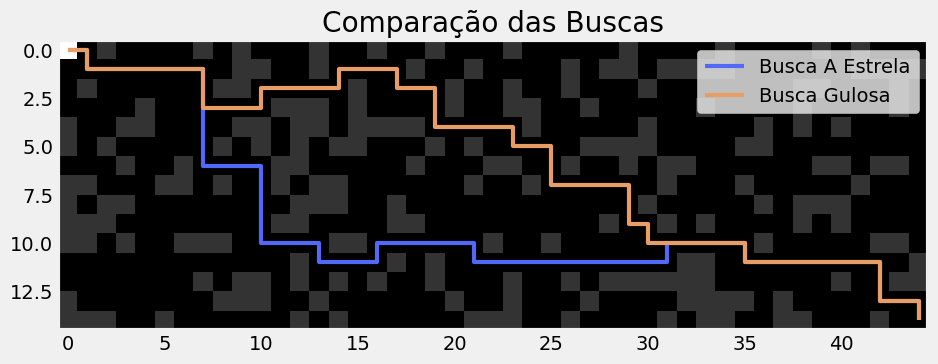

In [94]:
plt.figure(figsize=(10, 10))
plt.imshow(labirinto, cmap='gray', interpolation='nearest')
plt.plot([x[1] for x in caminho_otimo], [x[0] for x in caminho_otimo], color='#5268f7', linewidth=3, label='Busca A Estrela')
plt.plot([x[1] for x in caminho_ok], [x[0] for x in caminho_ok], color='#e89d64', linewidth=3, label='Busca Gulosa')
plt.grid(False)
plt.title('Comparação das Buscas')
plt.legend()
plt.show()

#### Teste do Algoritmo `Nível Extremo`
# $\large 2.000\text{ }x\text{ }3.000$

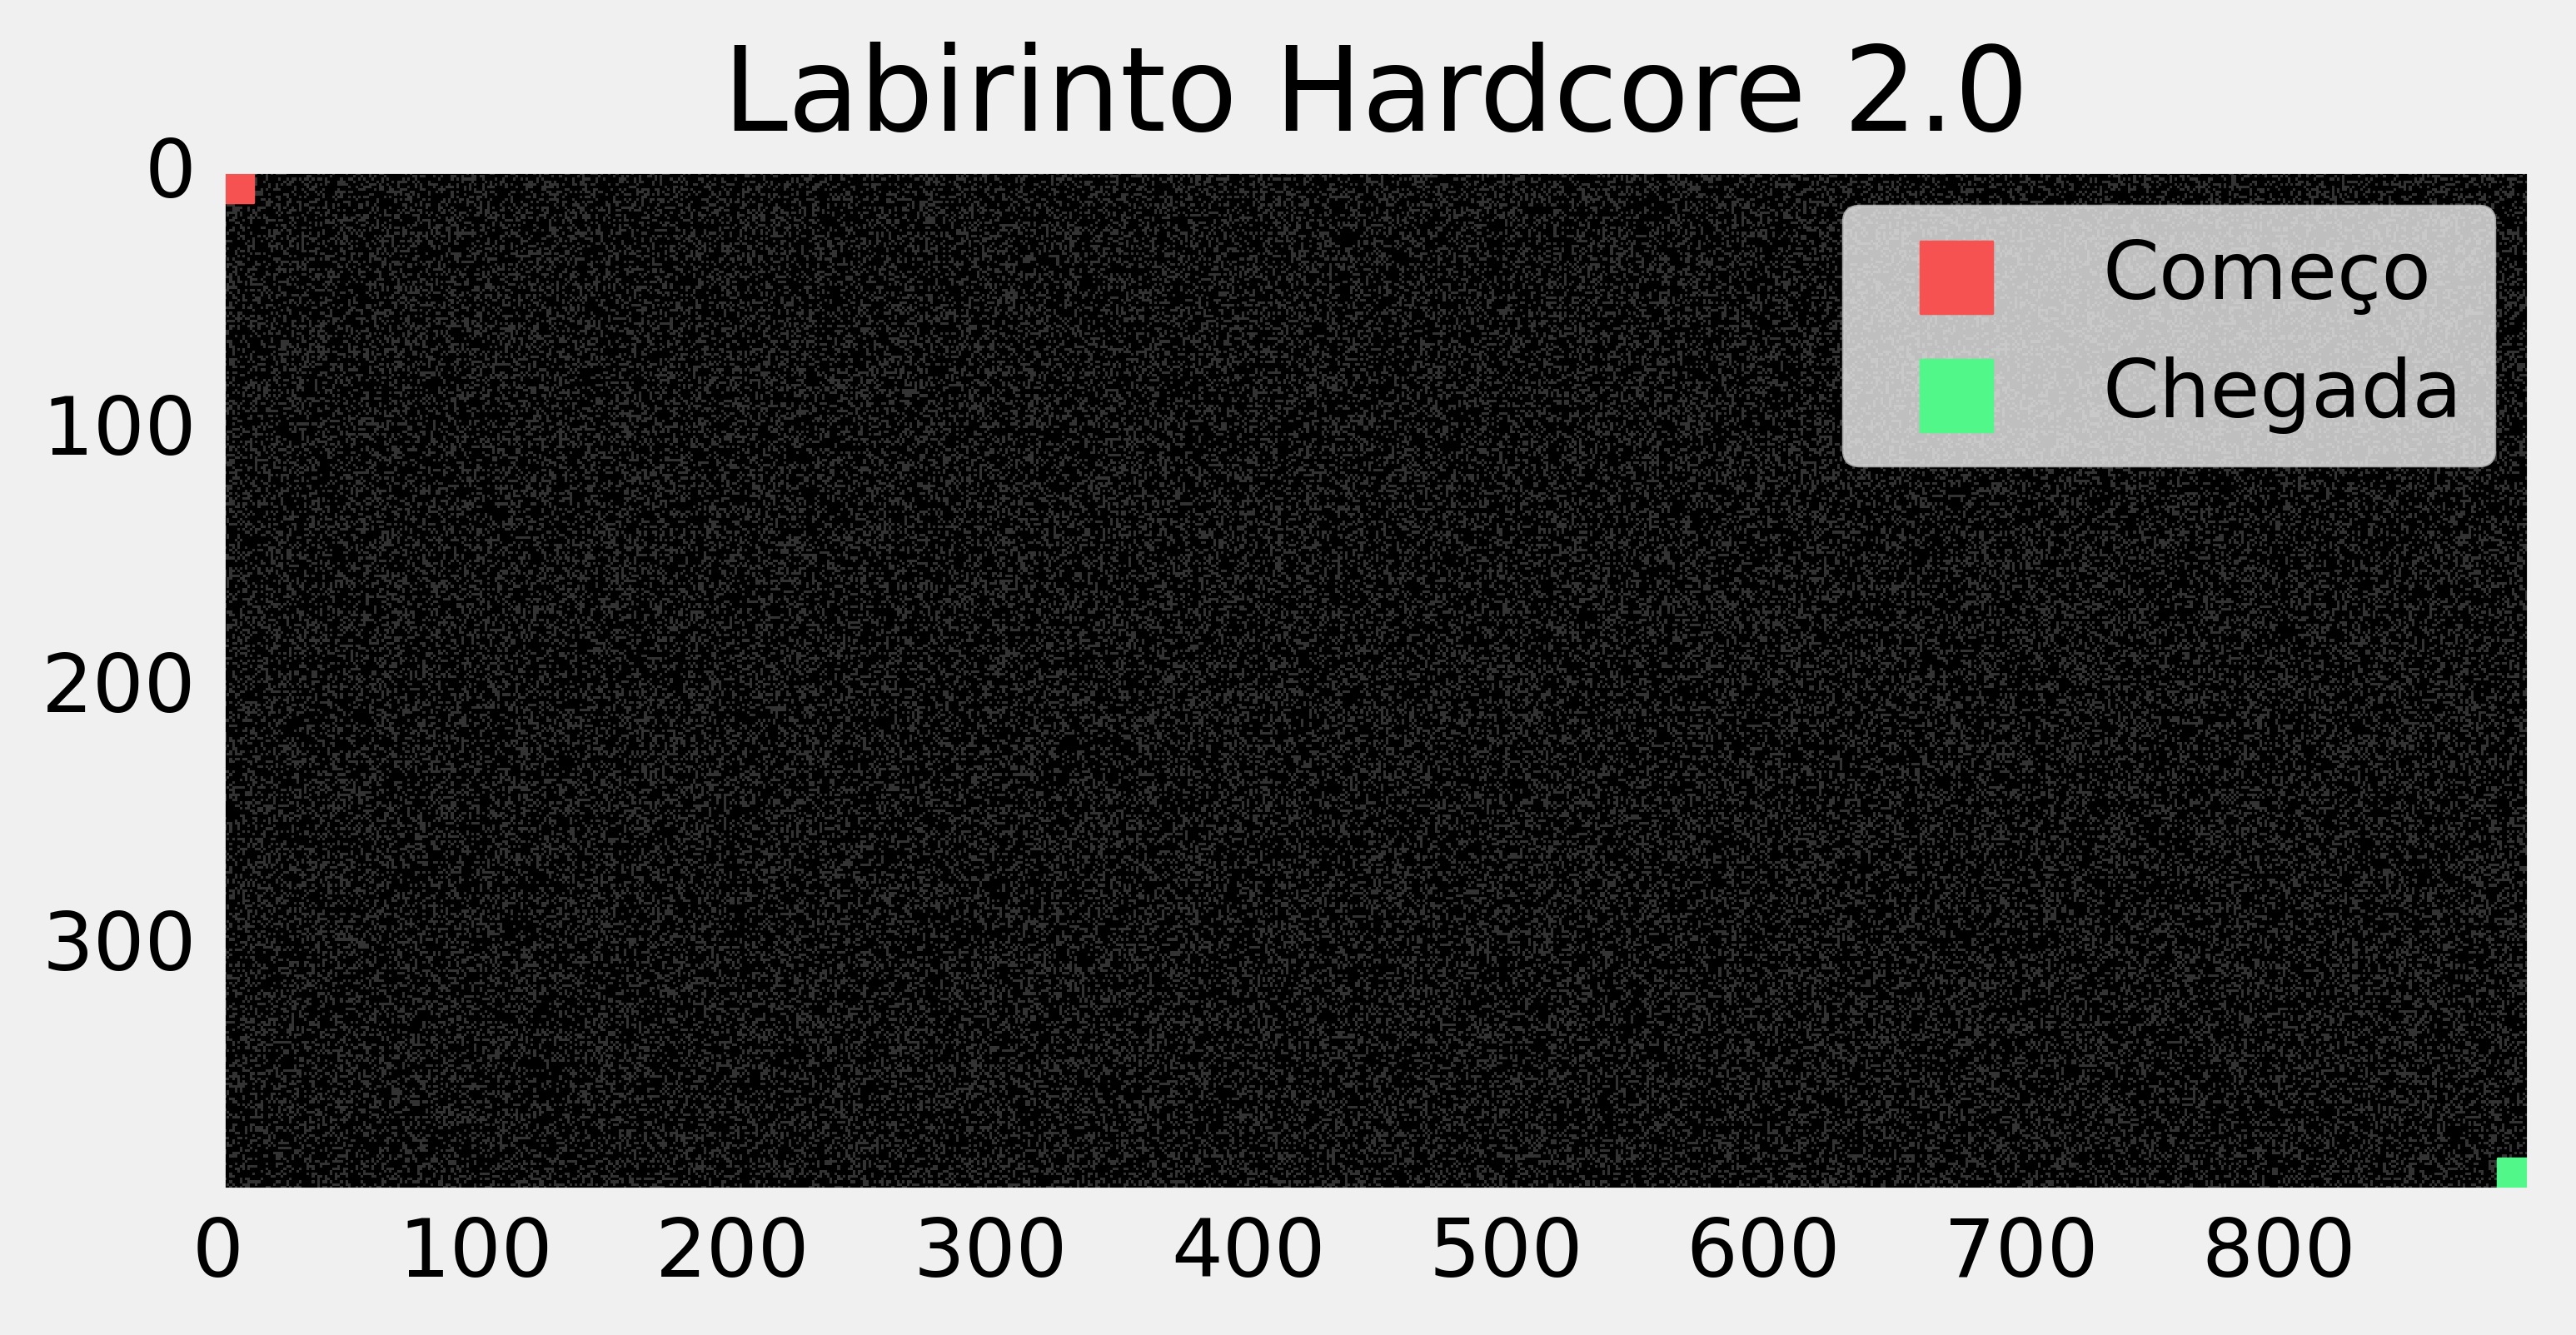

In [98]:
# Dimensão do Labirinto
d = 400, 900

# Criação do labirinto & Definição do ponto de início (A) e fim (B)
labirinto = np.random.choice([0, 1], size=(d[0], d[1]), p=[.7, .3])

# Remover barreiras no inicio e fim
labirinto[ d[0]-1 ][ d[1]-1 ] = 0
labirinto[ d[0]-1 ][ d[1]-2 ] = 0
labirinto[ d[0]-2 ][ d[1]-1 ] = 0

labirinto[0][0] = 5
labirinto[0][1] = 0
labirinto[1][0] = 0

inicio = (0, 0)
fim = (d[0]-1, d[1]-1)

plt.figure(dpi=500)
plt.imshow(labirinto, cmap='gray', interpolation='nearest')
plt.scatter(inicio[1], inicio[0], color='#f75252', label='Começo', s=150, marker='s')
plt.scatter(fim[1], fim[0], color='#52f789', label='Chegada', s=150, marker='s')
plt.title('Labirinto Hardcore 2.0'), plt.grid(False), plt.legend(), plt.show();

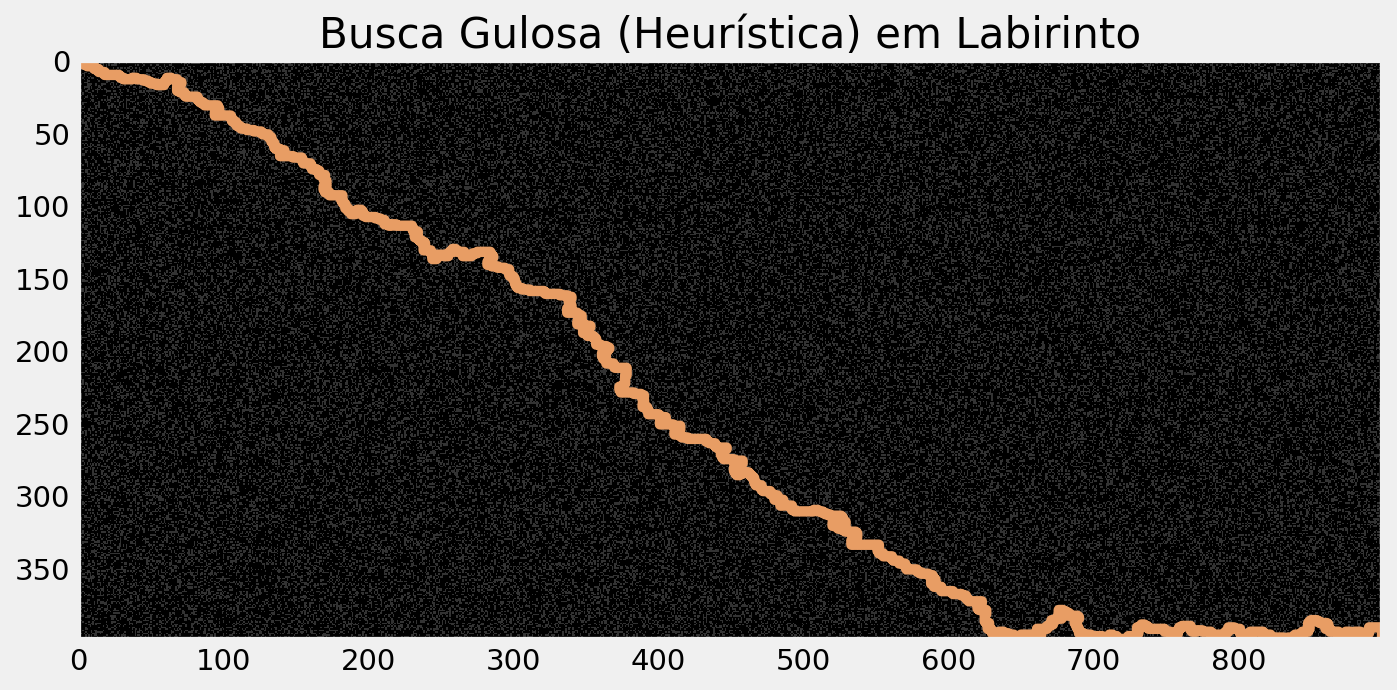

In [99]:
caminho_ok = greedy_search(labirinto, inicio, fim, it=1000, hr=0)

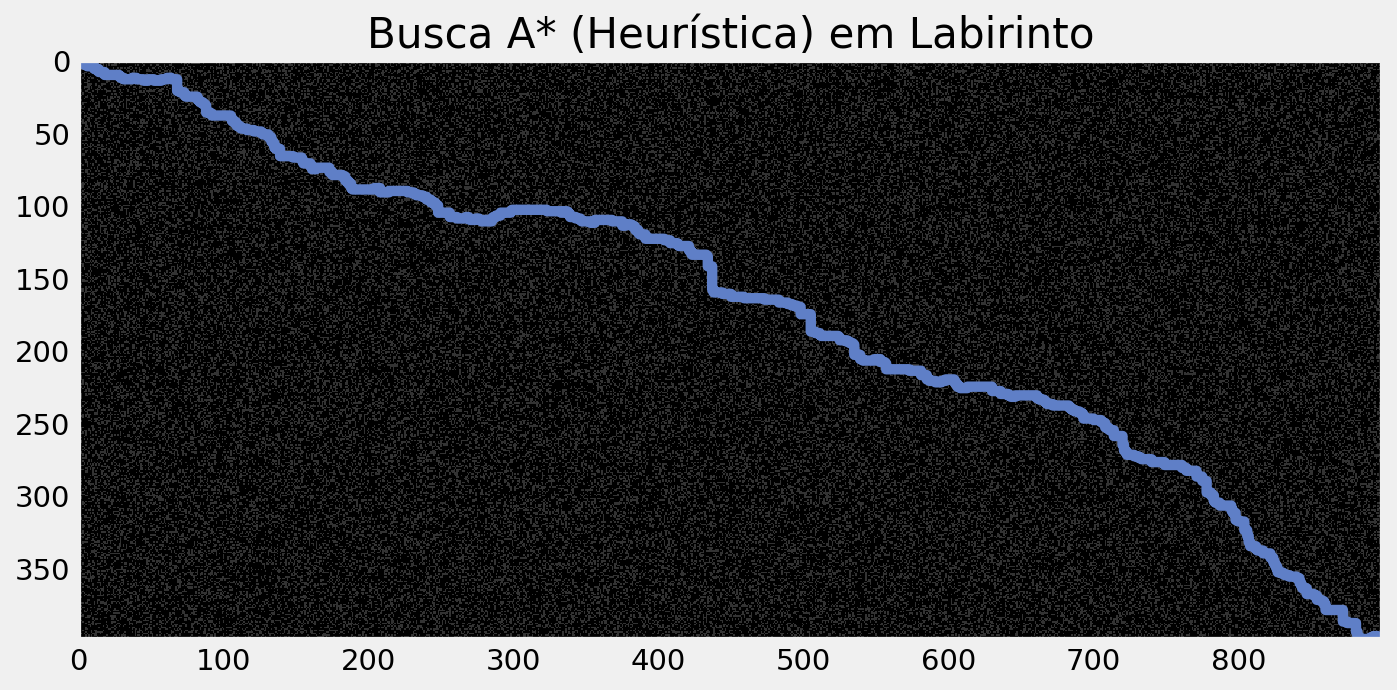

In [100]:
caminho_otimo = a_star(labirinto, inicio, fim, it=5000, hr=0)

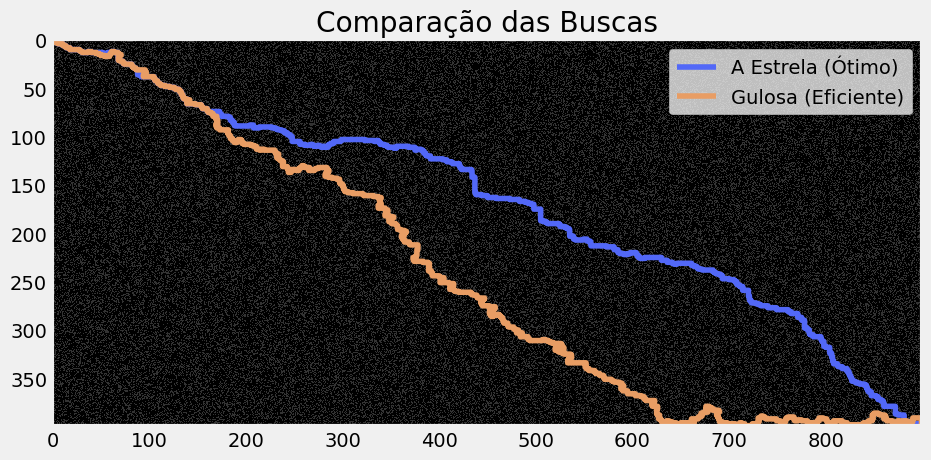

In [101]:
plt.figure(figsize=(10, 10))
plt.imshow(labirinto, cmap='gray', interpolation='nearest')
plt.plot([x[1] for x in caminho_otimo], [x[0] for x in caminho_otimo], color='#5268f7', linewidth=4, label='A Estrela (Ótimo)')
plt.plot([x[1] for x in caminho_ok], [x[0] for x in caminho_ok], color='#e89d64', linewidth=4, label='Gulosa (Eficiente)')
plt.grid(False)
plt.title('Comparação das Buscas')
plt.legend()
plt.show()

### Testando com o Cálculo Errado

In [152]:
d = 30, 90

labirinto = np.random.choice([0, 1], size=(d[0], d[1]), p=[.7, .3])
inicio = (0, 0)
fim = (d[0]-1, d[1]-1)

# Esse valor só serve para que a cor (que é Preto no 1, valor max. e
# Branco para 0, valor min) fique mais no tom de cinza para 5 que é o valor max.
labirinto[0][0] = 5

In [165]:
def h(p1, p2): return ((p1[0] * 0.5 )**2 + (5 * p2[1])/3 )**(10/2)

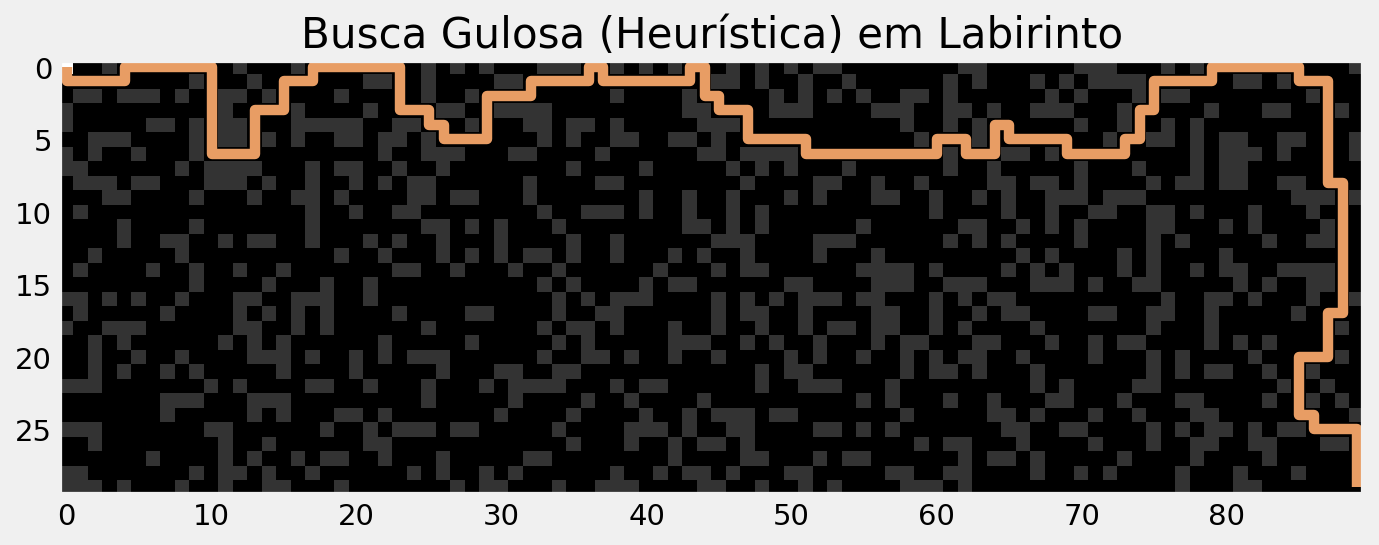

In [166]:
erro = greedy_search(labirinto, inicio, fim, it=10, hr=0)

### Comparação com a Distancia de Manhattan

In [167]:
def h(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1]) # Manhattan 

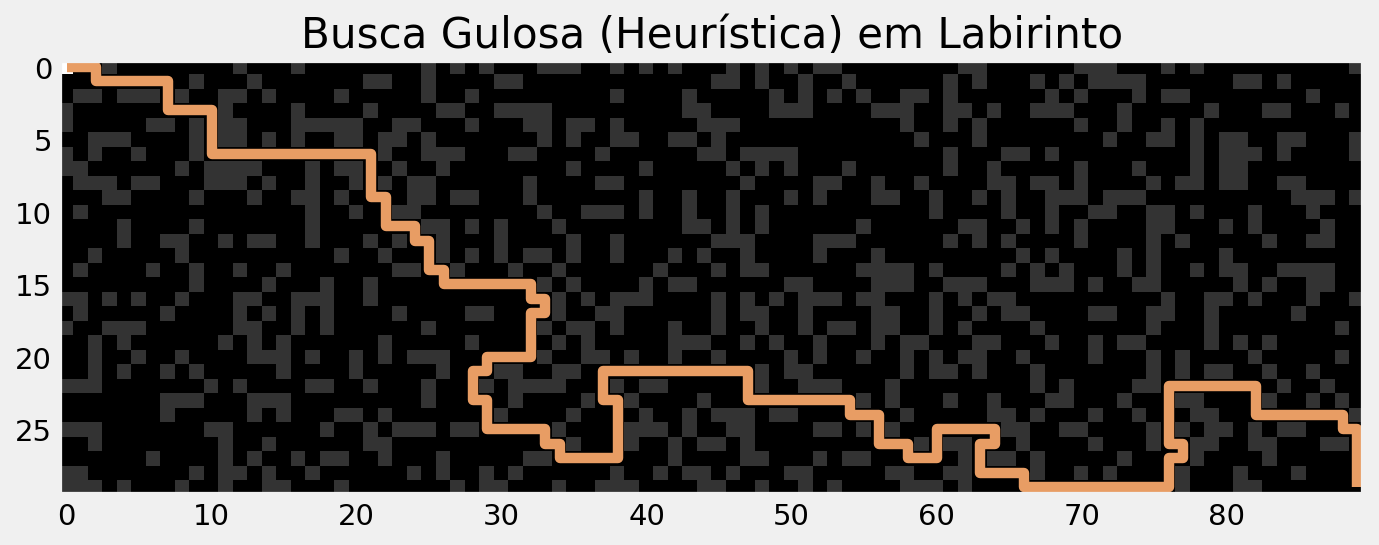

In [168]:
normal = greedy_search(labirinto, inicio, fim, it=10, hr=0)